In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr

import warnings
warnings.filterwarnings('ignore', 'numpy equal will not check object identity in the future')

from src.data_processing import read_analysis_files

brain_areas = ['CA1', 'iCA1', 'PFC']


In [7]:
from src.parameters import (ANIMALS, SAMPLING_FREQUENCY, N_DAYS)
from src.data_processing import make_epochs_dataframe, get_group_name
epoch_info = make_epochs_dataframe(ANIMALS, range(1, N_DAYS + 1))
epoch_keys = epoch_info[(epoch_info.type == 'run') & (epoch_info.environment != 'lin')].index

In [8]:
resolution = '20Hz_Resolution'
covariate = 'all_ripples'
level = ''
group_name = get_group_name(resolution, covariate, level, 'power')
group_name

'20Hz_Resolution/all_ripples/power'

In [9]:
transform_func = lambda ds: ds.sel(
    tetrode=ds.tetrode[ds.brain_area == 'PFC'],
    frequency=slice(150, 250)
)

In [10]:
power = read_analysis_files(epoch_keys, group=group_name, preprocess=transform_func)

In [11]:
power

<xarray.Dataset>
Dimensions:            (frequency: 6, recording_session: 48, tetrode: 328, time: 19)
Coordinates:
  * tetrode            (tetrode) object 'HPa1415' 'HPa1416' 'HPa1417' ...
  * frequency          (frequency) float64 150.0 170.0 190.0 210.0 230.0 250.0
  * time               (time) float64 -0.425 -0.375 -0.325 -0.275 -0.225 ...
    brain_area         (recording_session, tetrode) object 'PFC' 'PFC' 'PFC' ...
  * recording_session  (recording_session) MultiIndex
  - animal             (recording_session) object 'HPa' 'HPa' 'HPa' 'HPa' ...
  - day                (recording_session) int64 1 1 2 2 3 3 4 4 5 5 6 6 7 7 ...
  - epoch              (recording_session) int64 4 6 2 4 2 4 2 4 2 4 2 4 2 4 ...
Data variables:
    power              (recording_session, time, frequency, tetrode) float64 1.331 ...

AttributeError: 'AxesSubplot' object has no attribute 'ravel'

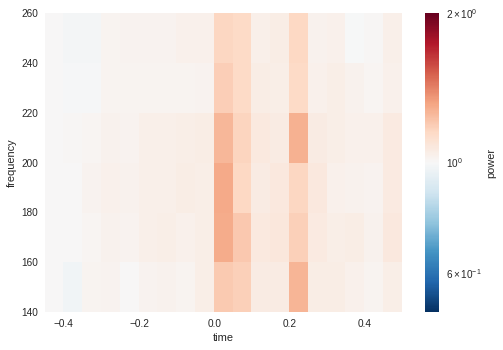

In [24]:
from matplotlib.colors import LogNorm

DIMS = ['recording_session', 'tetrode']

ds_change = (power / power.isel(time=0)).power

vmin = 0.5
vmax = 2

g = ds_change.mean(DIMS).plot(
    x='time', y='frequency', cmap='RdBu_r',
    norm=LogNorm(vmin=vmin, vmax=vmax),
    vmin=vmin, vmax=vmax, center=0);

for ax in g.axes.ravel().tolist():
    ax.axvline(0.0, color='black', linestyle='--');

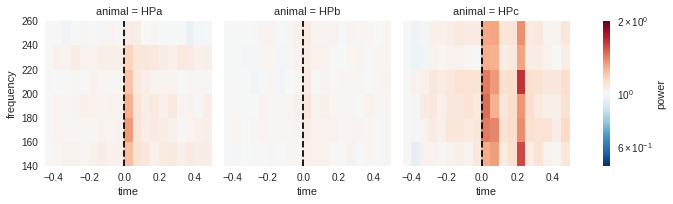

In [23]:
g = ds_change.groupby('animal').mean(DIMS).plot(
    x='time', y='frequency', cmap='RdBu_r',
    col='animal',
    norm=LogNorm(vmin=vmin, vmax=vmax),
    vmin=vmin, vmax=vmax, center=0);

for ax in g.axes.ravel().tolist():
    ax.axvline(0.0, color='black', linestyle='--')

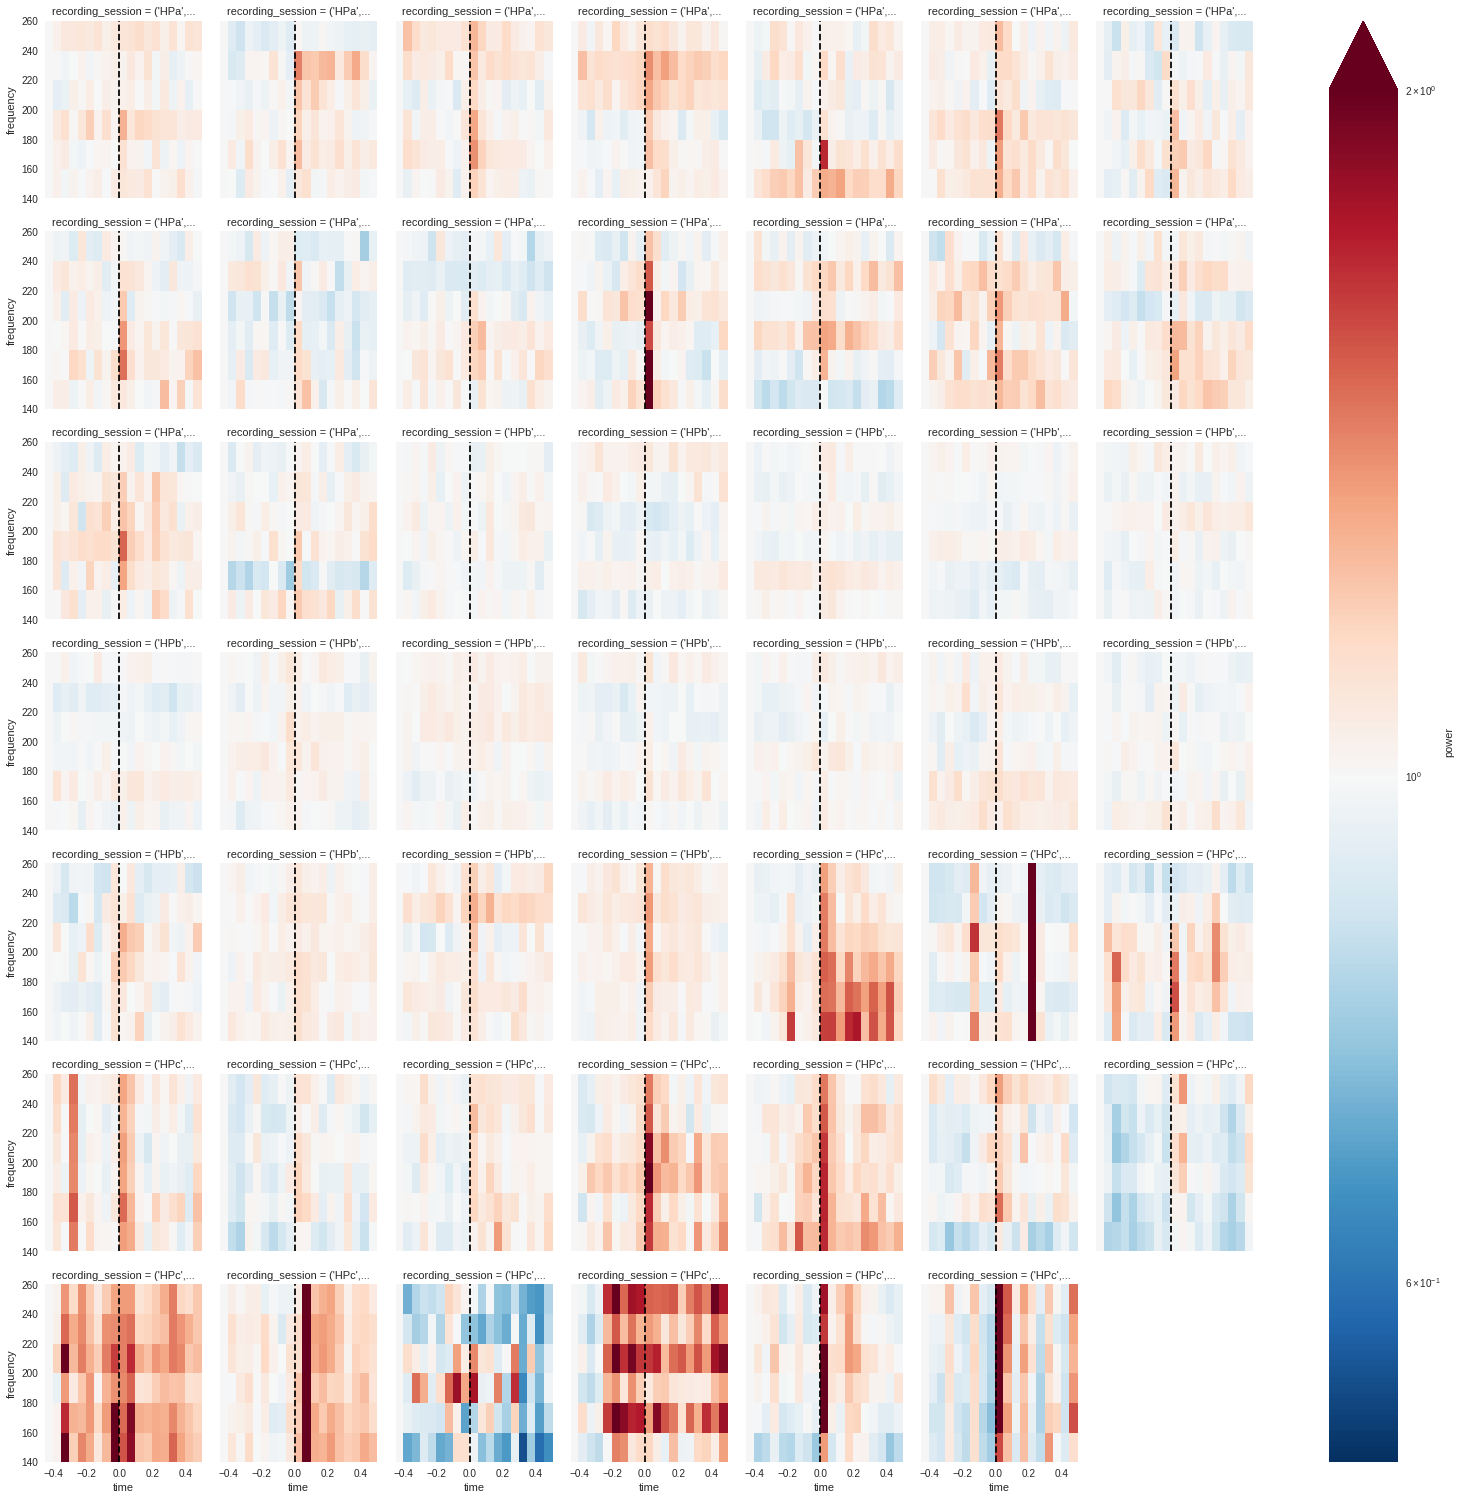

In [22]:
g = ds_change.groupby('recording_session').mean('tetrode').plot(
    x='time', y='frequency', cmap='RdBu_r',
    col='recording_session', col_wrap=7,
    norm=LogNorm(vmin=vmin, vmax=vmax),
    vmin=vmin, vmax=vmax, center=0)

for ax in g.axes.ravel().tolist():
    ax.axvline(0.0, color='black', linestyle='--');